In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import zipfile

file_path = '/content/New_C_NylonScrews_anomaly'
if not os.path.isdir(file_path):
  os.makedirs(file_path)

zip_path = '/content/gdrive/MyDrive/project/other/New_C_NylonScrews_anomaly detection/New_C_NylonScrews.zip'
zf = zipfile.ZipFile(zip_path, 'r')
zf.extractall(file_path)

file_list ['/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/train', '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/good', '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/bad']
path:  /content/New_C_NylonScrews_anomaly/New_C_NylonScrews/bad/2022-02-25-15-09-09-125-0_0.png
img.shape:  (800, 800, 3)


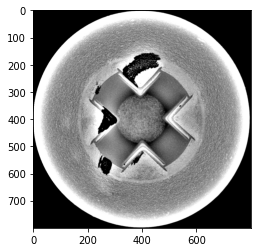

In [ ]:
# Show and check image

file_list = glob('/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/*') #列出所有資料夾
img_paths = glob('/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/bad/*.png')
path = np.random.choice(img_paths)
img = cv2.imread(path)
print('file_list', file_list)
print('path: ', path) 
print('img.shape: ', img.shape)
plt.imshow(img)
plt.show()

In [ ]:
path = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/train'
data_list = os.listdir(path)
print(data_list)

path_bad = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/bad'
data_list_bad = os.listdir(path_bad)
print(data_list_bad)

path_good = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/good'
data_list_good = os.listdir(path_good)
print(data_list_good)

df = pd.DataFrame()
df['ImageId'] = data_list

df_bad = pd.DataFrame()
df_bad['ImageId'] = data_list_bad

df_good = pd.DataFrame()
df_good['ImageId'] = data_list_good

['2022-02-25-14-49-40-830-0_300.png', '2022-02-25-14-37-26-088-0_150.png', '2022-02-25-14-33-58-764-0_120.png', '2022-02-25-14-25-50-410-0_30.png', '2022-02-25-14-26-07-274-0_330.png', '2022-02-25-14-55-11-279-0_270.png', '2022-02-25-14-30-59-543-0_210.png', '2022-02-25-14-35-56-497-0_30.png', '2022-02-25-15-02-51-438-0_150.png', '2022-02-25-14-31-51-970-0_120.png', '2022-02-25-14-48-54-061-0_210.png', '2022-02-25-14-48-20-211-0_90.png', '2022-02-25-14-24-29-710-0_90.png', '2022-02-25-14-48-20-211-0_0.png', '2022-02-25-14-57-59-786-0_240.png', '2022-02-25-14-38-23-716-0_150.png', '2022-02-25-14-59-35-853-0_180.png', '2022-02-25-14-38-40-271-0_330.png', '2022-02-25-14-48-00-029-0_0.png', '2022-02-25-14-57-09-439-0_270.png', '2022-02-25-14-35-35-740-0_180.png', '2022-02-25-14-34-49-411-0_240.png', '2022-02-25-14-24-29-710-0_300.png', '2022-02-25-14-23-00-722-0_30.png', '2022-02-25-14-29-32-276-0_150.png', '2022-02-25-14-57-09-439-0_0.png', '2022-02-25-14-38-56-735-0_60.png', '2022-02-25-

# Data generator

In [ ]:
train_datagen = ImageDataGenerator(
                horizontal_flip=True, 
                vertical_flip=True, 
                brightness_range=[0.5, 1.5],               
                dtype=np.float32,
                fill_mode='constant',
                cval=0,
                rotation_range=180,
                rescale=1/255.0,
                  
                )
validation_datagen = ImageDataGenerator(rescale=1/255.0,
                      dtype=np.float32
                      )

In [ ]:
train_path = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/train'
bad_path = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/bad'
good_path = '/content/New_C_NylonScrews_anomaly/New_C_NylonScrews/good'

from sklearn.model_selection import train_test_split

def split_df(df, trsize):
  train_df, valid_df = train_test_split(df, train_size=trsize, shuffle=True, random_state=123)
  
  print('train_df length: ', len(train_df), 'valid_df length: ', len(valid_df)) 
  return train_df, valid_df    

train_df, valid_df  = split_df(df, 0.9)

train_df length:  831 valid_df length:  93


In [ ]:
train_df

,ImageId
600,2022-02-25-14-27-13-043-0_300.png
821,2022-02-25-14-26-07-274-0_210.png
209,2022-02-25-14-26-51-503-0_120.png
918,2022-02-25-14-24-49-254-0_180.png
164,2022-02-25-14-29-32-276-0_330.png
...,...
98,2022-02-25-14-47-40-295-0_30.png
322,2022-02-25-14-52-40-777-0_60.png
382,2022-02-25-14-29-48-949-0_0.png
365,2022-02-25-14-57-09-439-0_150.png


In [ ]:

train_gen = train_datagen.flow_from_dataframe(train_df, 
                      directory=train_path, 
                      x_col='ImageId', 
                      class_mode=None, 
                      color_mode='grayscale',
                      batch_size=32,                                            
                      target_size=(256,256),
                      shuffle=True,
                      seed=123
                      )

valid_gen = validation_datagen.flow_from_dataframe(valid_df, 
                      directory=train_path, 
                      x_col='ImageId', 
                      class_mode=None, 
                      color_mode='grayscale',                      
                      batch_size=32,
                      target_size=(256,256),                     
                      shuffle=False
                      )

bad_gen = validation_datagen.flow_from_dataframe(dataframe=df_bad,
                     directory=bad_path,
                     x_col='ImageId', 
                     class_mode=None, 
                     color_mode='grayscale',                     
                     batch_size=1,
                     target_size=(256,256),
                     shuffle=False
                 
                     )

good_gen = validation_datagen.flow_from_dataframe(dataframe=df_good,
                     directory=good_path,
                     x_col='ImageId', 
                     class_mode=None, 
                     color_mode='grayscale',                    
                     batch_size=1,
                     target_size=(256,256),
                     shuffle=False               
                     )

Found 831 validated image filenames.
Found 93 validated image filenames.
Found 59 validated image filenames.
Found 15 validated image filenames.


<function matplotlib.pyplot.show(close=None, block=None)>

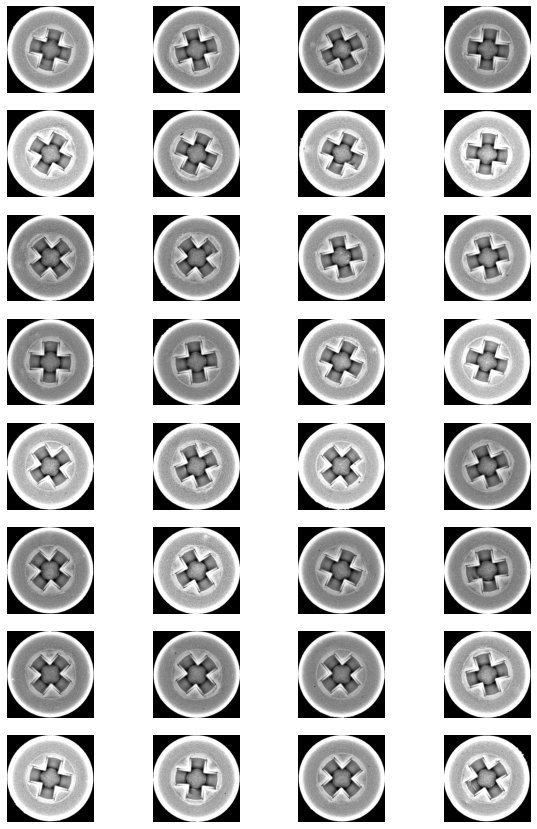

In [ ]:
plt.figure(figsize=(10, 15))
for i, img in enumerate(train_gen[4]):

  plt.subplot(8,4,i+1)
  img = np.squeeze(img, axis=2)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

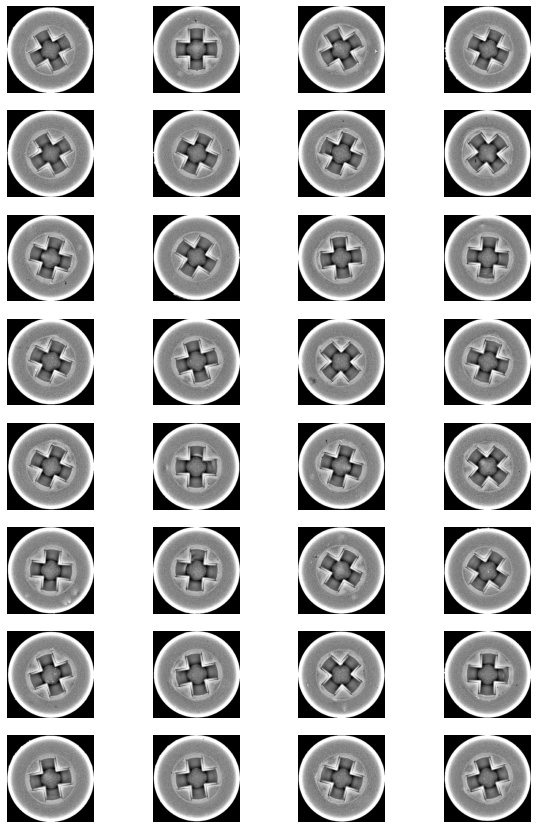

In [ ]:
plt.figure(figsize=(10, 15))
for i, img in enumerate(valid_gen[0]):
  plt.subplot(8,4,i+1)
  img = np.squeeze(img, axis=2)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

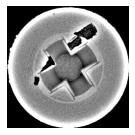

In [ ]:
plt.figure(figsize=(10, 5))
for i, img in enumerate(bad_gen[0]):
  plt.subplot(2,4,i+1)
  img = np.squeeze(img, axis=2)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.show

# Define model

In [ ]:
class Sampling(tf.keras.layers.Layer):
  def call(self, inputs):
    """Generates a random sample and combines with the encoder output
    
    Args:
      inputs -- output tensor from the encoder

    Returns:
      `inputs` tensors combined with a random sample
    """

    # unpack the output of the encoder
    mu, sigma = inputs

    # get the size and dimensions of the batch
    batch = tf.shape(mu)[0]
    dim = tf.shape(mu)[1]

    # generate a random tensor
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))

    # combine the inputs and noise
    return mu + tf.exp(0.5 * sigma) * epsilon

In [ ]:
from keras.layers import LeakyReLU

def encoder_layers(inputs, latent_dim):
  """Defines the encoder's layers.
  Args:
    inputs -- batch from the dataset
    latent_dim -- dimensionality of the latent space

  Returns:
    mu -- learned mean
    sigma -- learned standard deviation
    batch_2.shape -- shape of the features before flattening
  """

  x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', name="encode_conv2")(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

  x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', name="encode_conv3")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', name="encode_conv4")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  # assign to a different variable and extract the shape later
  batch_2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

  # flatten the features and feed into the Dense network
  x = tf.keras.layers.Flatten(name="encode_flatten")(batch_2)

  x = tf.keras.layers.Dense(80, activation='relu', name="encode_dense")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  # add output Dense networks for mu and sigma, units equal to the declared latent_dim.
  mu = tf.keras.layers.Dense(latent_dim, name='latent_mu')(x)
  sigma = tf.keras.layers.Dense(latent_dim, name ='latent_sigma')(x)

  return mu, sigma, batch_2.shape

In [ ]:
def encoder_model(latent_dim, input_shape):
  """Defines the encoder model with the Sampling layer
  Args:
    latent_dim -- dimensionality of the latent space
    input_shape -- shape of the dataset batch

  Returns:
    model -- the encoder model
    conv_shape -- shape of the features before flattening
  """

  # declare the inputs tensor with the given shape
  inputs = tf.keras.layers.Input(shape=input_shape)

  # get the output of the encoder_layers() function
  mu, sigma, conv_shape = encoder_layers(inputs, latent_dim=LATENT_DIM)

  # feed mu and sigma to the Sampling layer
  z = Sampling()((mu, sigma))

  # build the whole encoder model
  model = tf.keras.Model(inputs, outputs=[mu, sigma, z])

  return model, conv_shape

In [ ]:
def decoder_layers(inputs, conv_shape):
  """Defines the decoder layers.
  Args:
    inputs -- output of the encoder 
    conv_shape -- shape of the features before flattening

  Returns:
    tensor containing the decoded output
  """

  # feed to a Dense network with units computed from the conv_shape dimensions
  units = conv_shape[1] * conv_shape[2] * conv_shape[3]
  x = tf.keras.layers.Dense(units, activation="relu", name="decode_dense1")(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  
  # reshape output using the conv_shape dimensions
  x = tf.keras.layers.Reshape((conv_shape[1], conv_shape[2], conv_shape[3]), name="decode_reshape")(x)

  # upsample the features back to the original dimensions
  x = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation="relu", name="decode_conv2d_2")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation="relu", name="decode_conv2d_3")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation="relu", name="decode_conv2d_4")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same', activation="sigmoid", name="decode_final")(x)
  
  return x

In [ ]:
def decoder_model(latent_dim, conv_shape):
  """Defines the decoder model.
  Args:
    latent_dim -- dimensionality of the latent space
    conv_shape -- shape of the features before flattening

  Returns:
    model -- the decoder model
  """

  # set the inputs to the shape of the latent space
  inputs = tf.keras.layers.Input(shape=(latent_dim,))

  # get the output of the decoder layers
  outputs = decoder_layers(inputs, conv_shape)

  # declare the inputs and outputs of the model
  model = tf.keras.Model(inputs, outputs)
  
  return model

In [ ]:
def kl_reconstruction_loss(inputs, outputs, mu, sigma):
  """ Computes the Kullback-Leibler Divergence (KLD)
  Args:
    inputs -- batch from the dataset
    outputs -- output of the Sampling layer
    mu -- mean
    sigma -- standard deviation

  Returns:
    KLD loss
  """
  kl_loss = 1 + sigma - tf.square(mu) - tf.math.exp(sigma)
  kl_loss = tf.reduce_mean(kl_loss) * -0.5

  return kl_loss

In [ ]:
def vae_model(encoder, decoder, input_shape):
  """Defines the VAE model
  Args:
    encoder -- the encoder model
    decoder -- the decoder model
    input_shape -- shape of the dataset batch

  Returns:
    the complete VAE model
  """

  # set the inputs
  inputs = tf.keras.layers.Input(shape=input_shape)

  # get mu, sigma, and z from the encoder output
  mu, sigma, z = encoder(inputs)
  
  # get reconstructed output from the decoder
  reconstructed = decoder(z)

  # define the inputs and outputs of the VAE
  model = tf.keras.Model(inputs=inputs, outputs=reconstructed)

  # add the KL loss
  loss = kl_reconstruction_loss(inputs, z, mu, sigma)
  model.add_loss(loss)

  return model

In [ ]:
def get_models(input_shape, latent_dim):
  """Returns the encoder, decoder, and vae models"""
  encoder, conv_shape = encoder_model(latent_dim=latent_dim, input_shape=input_shape)
  decoder = decoder_model(latent_dim=latent_dim, conv_shape=conv_shape)
  vae = vae_model(encoder, decoder, input_shape=input_shape)
  
  return encoder, decoder, vae

In [ ]:
# Get the encoder, decoder and 'master' model (called vae)

LATENT_DIM = 128

encoder, decoder, vae = get_models(input_shape=(256,256,1), latent_dim=LATENT_DIM)

In [ ]:
# vae.load_weights('/content/gdrive/MyDrive/project/other/New_C_NylonScrews_anomaly detection/weights/2022_10_21_2316_w-1.h5')

In [ ]:
encoder.summary()
decoder.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 encode_conv2 (Conv2D)          (None, 256, 256, 16  160         ['input_19[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_48 (BatchN  (None, 256, 256, 16  64         ['encode_conv2[0][0]']           
 ormalization)                  )                                                          

In [ ]:
def generate_images(model, epoch, step, test_input):
  """Helper function to plot our 16 images

  Args:

  model -- the decoder model
  epoch -- current epoch number during training
  step -- current step number during training
  test_input -- random tensor with shape (16, LATENT_DIM)
  """

  # generate images from the test input
  predictions = model.predict(test_input)
  
  # plot the results
  fig = plt.figure(figsize=(16,8))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 8, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')

  fig.suptitle("epoch: {}".format(epoch))
  # plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
  plt.show()

In [ ]:
def generate_images2(reconstructed, epoch, step, input, loss):
  """Helper function to plot our 16 images

  Args:

  model -- the decoder model
  epoch -- current epoch number during training
  step -- current step number during training
  test_input -- random tensor with shape (16, LATENT_DIM)
  """

  # generate images from the test input
  
  # plot the results
  fig = plt.figure(figsize=(16,8))

  for i in range(reconstructed.shape[0]):
      plt.subplot(4, 8, 2*i+1)
      plt.imshow(reconstructed[i, :, :, 0], cmap='gray')
      plt.axis('off')

      plt.subplot(4, 8, 2*i+2)
      plt.imshow(input[i, :, :, 0], cmap='gray')
      plt.axis('off')
  
  # tight_layout minimizes the overlap between 2 sub-plots
  # fig.suptitle("epoch: {}, step: {}".format(epoch, step))
  fig.suptitle("epoch: {} step: {} loss: {}".format(epoch, step, loss))
  # plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
  plt.show()

# Training

In [ ]:
train_gen = train_datagen.flow_from_dataframe(train_df, 
                      directory=train_path, 
                      x_col='ImageId', 
                      class_mode=None, 
                      color_mode='grayscale',
                      batch_size=32,                                            
                      target_size=(256,256),
                      shuffle=True,
                      seed=123
                      )

Found 831 validated image filenames.


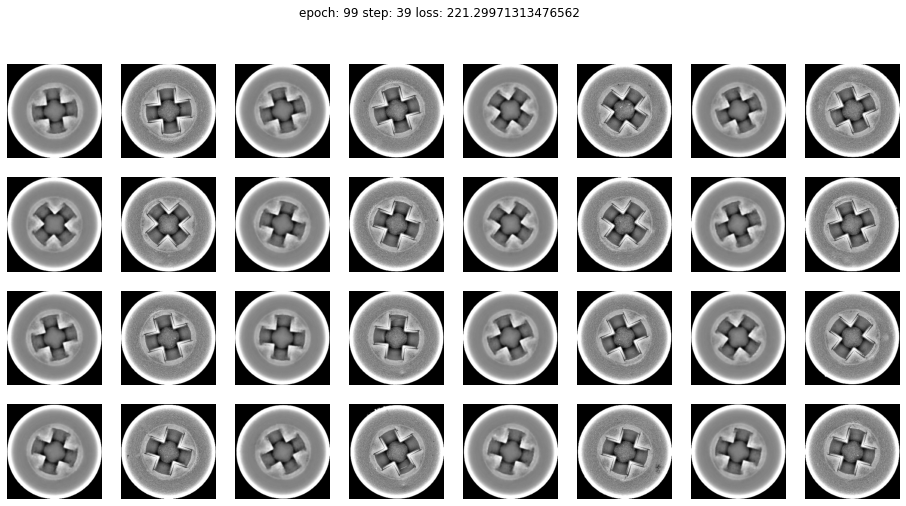

100%|██████████| 52/52 [00:25<00:00,  2.01it/s]

Epoch: 99 mean loss = 225.27884
-----------------------------------------------
-----------------------------------------------
[System Complete: 0:43:09.002714]


In [ ]:
from collections import defaultdict
from datetime import timedelta
import time
from tqdm import tqdm
from IPython import display

# Store loss each epoch
metrics = defaultdict(list)

# generate random vector as test input to the decoder
random_vector_for_generation = tf.random.normal(shape=[32, LATENT_DIM])

# initialize the helper function to display outputs from an untrained model
# generate_images(decoder, 0, 0, random_vector_for_generation)

# Set optimizer, loss metric and loss function
optimizer = tf.keras.optimizers.experimental.AdamW(learning_rate=0.0015)
MSE_loss = tf.keras.losses.MeanSquaredError()

batch_size = 16
train_gen.batch_size=batch_size
valid_gen.batch_size=batch_size

train_steps_per_epoch = len(train_df)//batch_size+1 
val_steps_per_epoch = len(valid_df)//batch_size+1

epochs=100
start = time.time()

for epoch in range(epochs):
  ep_start = time.time()
  print('Start of epoch %d' % (epoch+1,))
#===================================================================
# training step
  
  epoch_running_loss = []
  # iterate over the batches of the dataset.
  for step, x_batch_train in enumerate(tqdm(train_gen)):
    if step >= train_steps_per_epoch:  # manually detect the end of the epoch
      break

    with tf.GradientTape() as tape:

      # feed a batch to the VAE model
      reconstructed = vae(x_batch_train)

      # compute reconstruction loss
      flattened_inputs = tf.reshape(x_batch_train, shape=[-1])
      flattened_outputs = tf.reshape(reconstructed, shape=[-1])

      step_train_loss = MSE_loss(flattened_inputs, flattened_outputs)*65536

      # add KLD regularization loss
      step_train_loss += sum(vae.losses)
 
      # Store epoch loss
      epoch_running_loss.append(step_train_loss)
            
    # get the gradients and update the weights
    grads = tape.gradient(step_train_loss, vae.trainable_weights)
    optimizer.apply_gradients(zip(grads, vae.trainable_weights))

    if (step % 13) ==0:
      display.clear_output(wait=True)
      generate_images2(reconstructed, epoch, step, x_batch_train, loss=step_train_loss)

  # display.clear_output(wait=True)    
  # generate_images(decoder, epoch, step, random_vector_for_generation)

  # print('Epoch: %s step: %s mean loss = %s' % (epoch, step, np.mean(epoch_running_loss)))
  print('Epoch: %s mean loss = %s' % (epoch, np.mean(epoch_running_loss)))
  print('-----------------------------------------------')
      
  # compute the loss metric  
  metrics['train_loss'].append(np.mean(epoch_running_loss))
    
  train_gen.on_epoch_end()  # this shuffles the data at the end of each epoch

#===================================================================
# # Validation step
  
#   epoch_val_loss = []
#   for step, x_batch_val in enumerate(tqdm(valid_gen)):
#     # if step >= val_steps_per_epoch:
#     #   break
#     # feed a batch to the VAE model
#     reconstructed = vae(x_batch_val)

#     # compute reconstruction loss
#     flattened_inputs = tf.reshape(x_batch_val, shape=[-1])
#     flattened_outputs = tf.reshape(reconstructed, shape=[-1])
#     step_val_loss = MSE_loss(flattened_inputs, flattened_outputs)

#     # add KLD regularization loss
#     step_val_loss += sum(vae.losses)

#     # Store epoch loss
#     epoch_val_loss.append(step_val_loss)
#     if step >= val_steps_per_epoch:  # manually detect the end of the epoch
#       break
#   # compute the loss metric  
#   metrics['val_loss'].append(np.mean(epoch_val_loss))

#   ep_end = time.time()
  
#   print('[EPOCH] {}/{}'.format(epoch+1,epochs))
#   print('[TRAIN LOSS] {}'.format(np.mean(epoch_running_loss)))
#   print('[VAL LOSS] {}'.format(np.mean(epoch_val_loss)))
#   print('Epoch Complete in {}'.format(timedelta(seconds=ep_end-ep_start)))
#   print('-----------------------------------------------')

end = time.time()
print('-----------------------------------------------')
print('[System Complete: {}]'.format(timedelta(seconds=end-start)))

In [ ]:
vae.save_weights('/content/gdrive/MyDrive/project/other/New_C_NylonScrews_anomaly detection/weights/2023_03_07_0205_w.h5')

In [ ]:
vae.save('/content/gdrive/MyDrive/project/other/New_C_NylonScrews_anomaly detection/weights/2023_03_07_0205_m.h5')

In [ ]:
plt.plot(list(i+1 for i in range(100)), np.array(metrics['train_loss']), label="Training Loss")
plt.plot(list(i+1 for i in range(100)), np.array(metrics['val_loss']), label='Validation Loss')
plt.legend()
plt.show()

100%|██████████| 831/831 [00:43<00:00, 19.24it/s]


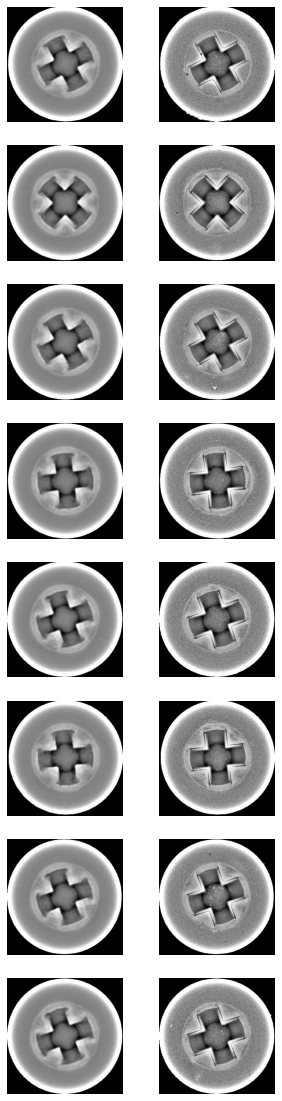

In [ ]:
metrics = defaultdict(list)

metrics['trian_loss']=[]
trian_sample = []
trian_sample_origin = []
train_gen.batch_size = 1
trian_steps_per_epoch = len(train_df)//train_gen.batch_size

epoch_train_loss = []
for step, x_batch_train in enumerate(tqdm(train_gen)):
  if step == trian_steps_per_epoch:
    break
  # Store orginal image
  trian_sample_origin.append(x_batch_train)
  
  # Model predict
  reconstructed = vae(x_batch_train)
  
  # Store image predicted     
  trian_sample.append(reconstructed)

  # Compute reconstruction loss
  flattened_inputs = tf.reshape(x_batch_train, shape=[-1])
  flattened_outputs = tf.reshape(reconstructed, shape=[-1])
  train_loss = MSE_loss(flattened_inputs, flattened_outputs)*65536
  
  # Add KLD regularization loss
  train_loss += sum(vae.losses)
  
  # Compute the loss metric
  epoch_train_loss.append(train_loss)
   
trian_sample = np.array(trian_sample)
trian_sample_origin = np.array(trian_sample_origin)
random_idx = np.random.choice(trian_sample.shape[0], 8, replace=False)

plt.figure(figsize=(5, 20))
for i, img in enumerate(trian_sample[random_idx]):
  plt.subplot(8,2,2*i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(trian_sample_origin[random_idx]):
  plt.subplot(8,2,2*k+2)
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

100%|██████████| 93/93 [00:05<00:00, 18.26it/s]


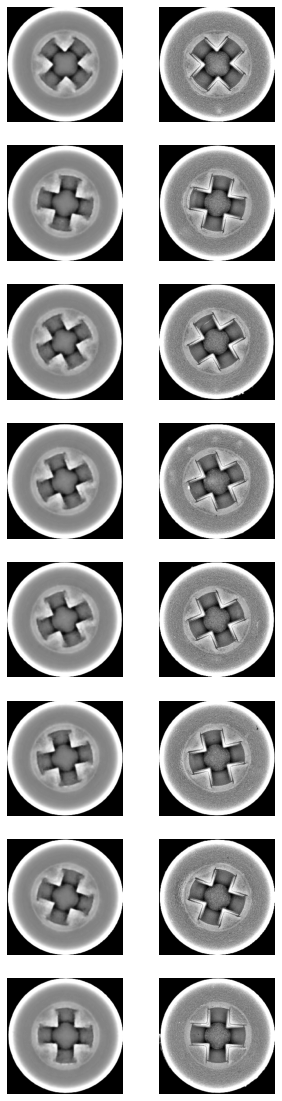

In [ ]:
metrics['valid_loss']=[]
valid_sample = []
valid_sample_origin = []
valid_gen.batch_size = 1
valid_steps_per_epoch = len(valid_df)//valid_gen.batch_size

epoch_valid_loss = []
for step, x_batch_valid in enumerate(tqdm(valid_gen)):
  if step == valid_steps_per_epoch:
    break
  # Store orginal image
  valid_sample_origin.append(x_batch_valid)
  
  # Model predict
  reconstructed = vae(x_batch_valid)
  
  # Store image predicted     
  valid_sample.append(reconstructed)

  # Compute reconstruction loss
  flattened_inputs = tf.reshape(x_batch_valid, shape=[-1])
  flattened_outputs = tf.reshape(reconstructed, shape=[-1])
  valid_loss = MSE_loss(flattened_inputs, flattened_outputs)*65536
  
  # Add KLD regularization loss
  valid_loss += sum(vae.losses)
  
  # Compute the loss metric
  epoch_valid_loss.append(valid_loss)
   
valid_sample = np.array(valid_sample)
valid_sample_origin = np.array(valid_sample_origin)
random_idx = np.random.choice(valid_sample.shape[0], 8, replace=False)

plt.figure(figsize=(5, 20))
for i, img in enumerate(valid_sample[random_idx]):
  plt.subplot(8,2,2*i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(valid_sample_origin[random_idx]):
  plt.subplot(8,2,2*k+2)
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

100%|██████████| 59/59 [00:02<00:00, 23.10it/s]


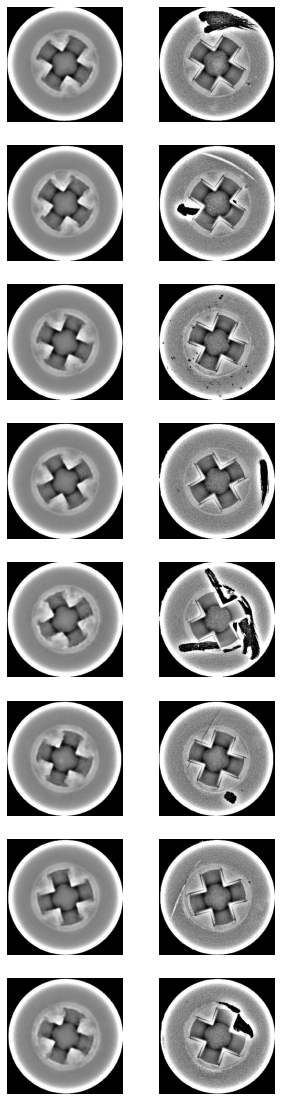

In [ ]:
metrics['bad_loss']=[]
bad_sample = []
bad_sample_origin = []
bad_steps_per_epoch = len(df_bad)//bad_gen.batch_size

epoch_bad_loss = []
for step, x_batch_bad in enumerate(tqdm(bad_gen)):
  if step == bad_steps_per_epoch:
    break
  # Store orginal image
  bad_sample_origin.append(x_batch_bad)
  
  # Model predict
  reconstructed = vae(x_batch_bad)
  
  # Store image predicted     
  bad_sample.append(reconstructed)

  # Compute reconstruction loss
  flattened_inputs = tf.reshape(x_batch_bad, shape=[-1])
  flattened_outputs = tf.reshape(reconstructed, shape=[-1])
  bad_loss = MSE_loss(flattened_inputs, flattened_outputs)*65536
  
  # Add KLD regularization loss
  bad_loss += sum(vae.losses)
  
  # Compute the loss metric
  epoch_bad_loss.append(bad_loss)
   
bad_sample = np.array(bad_sample)
bad_sample_origin = np.array(bad_sample_origin)
random_idx = np.random.choice(bad_sample.shape[0], 8, replace=False)

plt.figure(figsize=(5, 20))
for i, img in enumerate(bad_sample[random_idx]):
  plt.subplot(8,2,2*i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(bad_sample_origin[random_idx]):
  plt.subplot(8,2,2*k+2)
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()



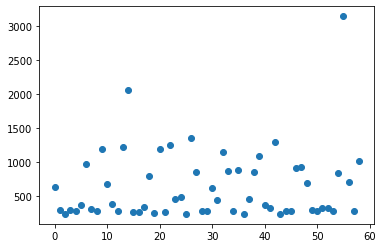

In [ ]:
plt.scatter(x=range(len(epoch_bad_loss)),y=np.array(epoch_bad_loss))

[ 1  2  3  4  5  7  8 11 12 15 16 17 19 21 23 24 25 28 29 31 34 36 37 40
 41 43 44 45 49 50 51 52 53 57]
34


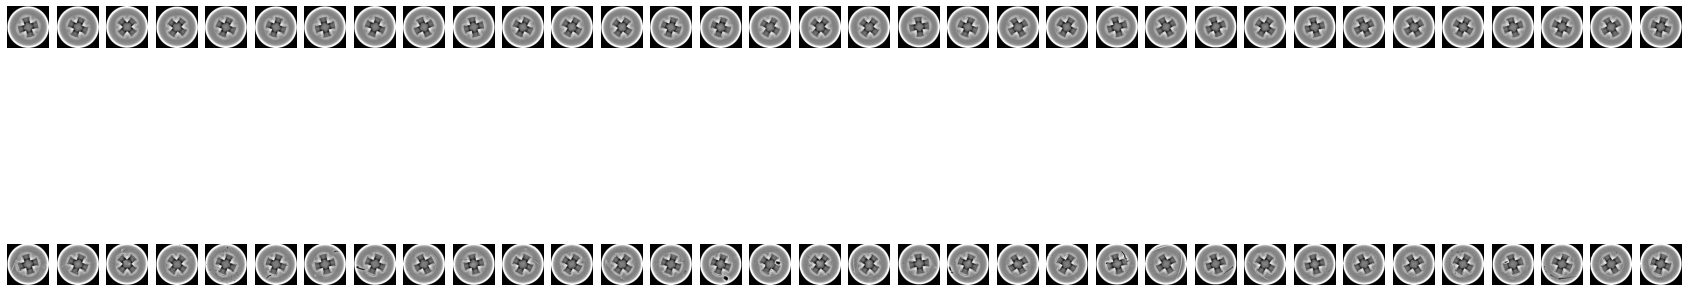

In [ ]:
epoch_bad_loss = np.array(epoch_bad_loss)
bad_Outliers_idx = np.where(epoch_bad_loss<500)[0]
print(bad_Outliers_idx)
print(len(bad_Outliers_idx))
plt.figure(figsize=(30, 8))
for i, img in enumerate(bad_sample[bad_Outliers_idx]):
  plt.subplot(2,len(bad_Outliers_idx),i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(bad_sample_origin[bad_Outliers_idx]):
  plt.subplot(2,len(bad_Outliers_idx),k+1+len(bad_Outliers_idx))
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

100%|██████████| 15/15 [00:01<00:00, 11.05it/s]


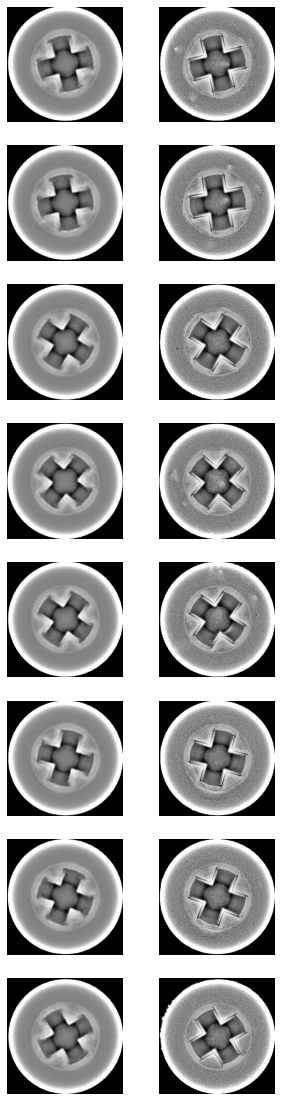

In [ ]:
metrics['good_loss']=[]
good_sample = []
good_sample_origin = []
good_steps_per_epoch = len(df_good)//good_gen.batch_size

epoch_good_loss = []
for step, x_batch_good in enumerate(tqdm(good_gen)):
  if step == good_steps_per_epoch:
    break

  # Store orginal image
  good_sample_origin.append(x_batch_good)

  # Model predict 
  reconstructed = vae(x_batch_good)

  # Store image predicted      
  good_sample.append(reconstructed)

  # compute reconstruction loss
  flattened_inputs = tf.reshape(x_batch_good, shape=[-1])
  flattened_outputs = tf.reshape(reconstructed, shape=[-1])
  good_loss = MSE_loss(flattened_inputs, flattened_outputs)*65536
  
  # add KLD regularization loss
  good_loss += sum(vae.losses)

  # compute the loss metric
  epoch_good_loss.append(good_loss)
  
good_sample = np.array(good_sample)
good_sample_origin = np.array(good_sample_origin)
random_idx = np.random.choice(good_sample.shape[0], 8, replace=False)

plt.figure(figsize=(5, 20))
for i, img in enumerate(good_sample[random_idx]):
  plt.subplot(8,2,2*i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(good_sample_origin[random_idx]):
  plt.subplot(8,2,2*k+2)
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

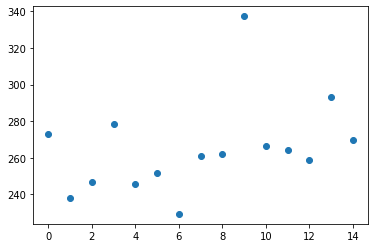

In [ ]:
plt.scatter(x=range(len(epoch_good_loss)),y=np.array(epoch_good_loss))

In [ ]:
epoch_good_loss = np.array(epoch_good_loss)
good_Outliers_idx = np.where(epoch_good_loss>800)[0]

print(good_Outliers_idx)

plt.figure(figsize=(30, 8))
for i, img in enumerate(good_sample[good_Outliers_idx]):
  plt.subplot(2,len(good_Outliers_idx),i+1)
  img = np.squeeze(img, axis=0)  
  plt.imshow(img[:,:,0], cmap='gray')
  plt.axis('off')

for k, img_origin in enumerate(good_sample_origin[good_Outliers_idx]):
  plt.subplot(2,len(good_Outliers_idx),k+1+len(good_Outliers_idx))
  img_origin = np.squeeze(img_origin, axis=0)  
  plt.imshow(img_origin[:,:,0], cmap='gray')
  plt.axis('off')
plt.show()

[]


<Figure size 2160x576 with 0 Axes>

In [ ]:
# Get reconstruction loss threshold.
threshold = np.mean(epoch_train_loss + epoch_valid_loss) + 1*np.std(epoch_train_loss + epoch_valid_loss)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  250.7352695465088


Text(65, 275.8087965011597, 'threshold')

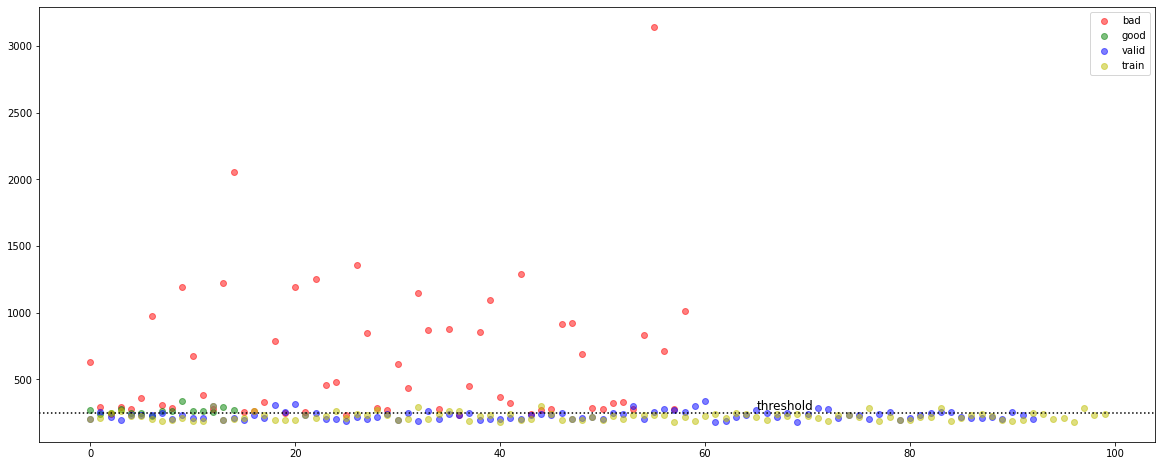

In [ ]:
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(len(epoch_bad_loss)), epoch_bad_loss, c='r', alpha=0.5, label='bad')
plt.scatter(np.arange(len(epoch_good_loss)), epoch_good_loss, c='g', alpha=0.5, label='good')
plt.scatter(np.arange(len(epoch_valid_loss)), epoch_valid_loss, c='b', alpha=0.5, label='valid')
plt.scatter(np.arange(len(epoch_train_loss[:100])), epoch_train_loss[:100], c='y', alpha=0.5, label='train')
plt.legend()
plt.axhline(threshold, color='k', linestyle='dotted')
plt.text(65, threshold*1.1, 'threshold', rotation='horizontal', color='k', fontsize=12)

Count missed bad sample: 5


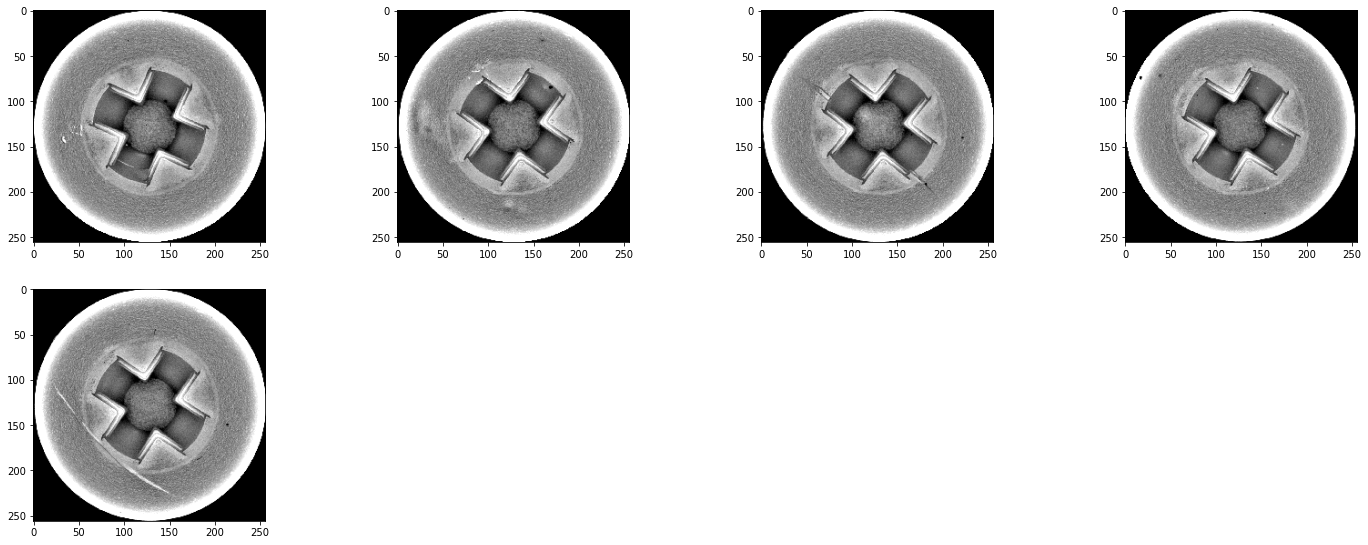

In [ ]:
bad_miss_count = np.where(epoch_bad_loss<threshold)[0]
print('Count missed bad sample:',len(bad_miss_count))
plt.figure(figsize=(25, 35))
for idx, i in enumerate(list(bad_miss_count)):
    plt.subplot(7, 4, idx+1)
    plt.imshow(bad_sample_origin[i][0,:,:,0], cmap='gray')